regression model:

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.02,Good,D,VS2,63.2,58.0,6.36,6.40,4.03,8.928
1,1,0.35,Very Good,H,VVS2,61.0,57.0,4.54,4.57,2.77,6.477
2,2,0.31,Premium,H,VVS1,60.5,58.0,4.43,4.40,2.67,6.810
3,3,0.38,Ideal,E,VS1,61.4,56.0,4.66,4.69,2.87,6.824
4,4,1.64,Ideal,G,VVS2,61.8,56.0,7.59,7.60,4.69,9.776
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,Ideal,G,VVS2,62.2,55.0,6.77,6.81,4.23,9.149
40451,40451,1.50,Good,H,VS1,64.2,56.0,7.30,7.09,4.62,9.077
40452,40452,1.06,Ideal,E,VS2,61.9,55.0,6.54,6.58,4.06,8.892
40453,40453,0.31,Premium,D,SI2,60.1,58.0,4.40,4.38,2.64,6.385


In [4]:
df_test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.81,Ideal,F,SI1,61.5,57.0,6.01,6.06,3.71
1,1,0.50,Fair,F,I1,63.8,58.0,5.08,4.97,3.21
2,2,0.31,Ideal,D,VVS2,60.1,56.0,4.43,4.46,2.67
3,3,1.52,Fair,I,SI2,64.7,58.0,7.19,7.22,4.66
4,4,0.35,Premium,D,VVS1,60.8,58.0,4.55,4.53,2.76
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.52,Ideal,D,VVS2,61.4,56.0,5.23,5.20,3.20
13481,13481,1.01,Very Good,E,VS2,59.3,59.0,6.50,6.56,3.87
13482,13482,1.50,Premium,H,VS2,60.6,61.0,7.34,7.31,4.44
13483,13483,0.40,Ideal,E,VVS2,62.5,54.0,4.75,4.76,2.97


- assigns a numerical value to each diamond cut type.
- assigns a numerical value to each diamond clarity type.
- assigns a numerical value to each diamond clarity type.

In [5]:

cut_type = {
    'Ideal': 5,
    'Premium': 4,
    'Very Good': 3,
    'Good': 2,
    'Fair': 1
}

df_train['cut'] = df_train['cut'].map(cut_type)

In [6]:

color_type = {
    'D': 7,
    'E': 6,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1
}

df_train['color'] = df_train['color'].map(color_type)

In [7]:

clarity_type = {
    'IF': 8,
    'VVS1': 7,
    'VVS2': 6,
    'VS1': 5,
    'VS2': 4,
    'SI1': 3,
    'SI2': 2,
    'I1': 1

}

df_train['clarity'] = df_train['clarity'].map(clarity_type)

In [8]:
print(df_train.shape[0])
df_train.sample()

40455


,id,carat,cut,color,clarity,depth,table,x,y,z,price
33346,33346,0.31,3,7,2,62.9,59.0,4.28,4.31,2.7,6.136


In [9]:
print(df_test.shape[0])
df_test.sample()

13485


,id,carat,cut,color,clarity,depth,table,x,y,z
6560,6560,0.7,Ideal,E,SI1,62.4,55.0,5.66,5.69,3.54


correlation matrix  is calculated between all the columns in the training dataset, and a bar plot shows to represent the correlation of each feature with respect to the price.

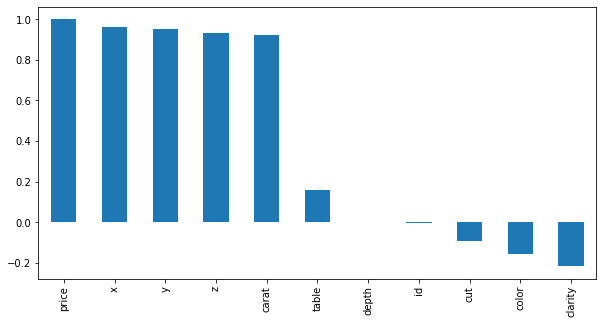

In [10]:

corr_mat = df_train.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

In [11]:
df_train.drop(['depth','table'], axis = 1, inplace = True) 

In [12]:
df_train

,id,carat,cut,color,clarity,x,y,z,price
0,0,1.02,2,7,4,6.36,6.40,4.03,8.928
1,1,0.35,3,3,6,4.54,4.57,2.77,6.477
2,2,0.31,4,3,7,4.43,4.40,2.67,6.810
3,3,0.38,5,6,5,4.66,4.69,2.87,6.824
4,4,1.64,5,4,6,7.59,7.60,4.69,9.776
...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,5,4,6,6.77,6.81,4.23,9.149
40451,40451,1.50,2,3,5,7.30,7.09,4.62,9.077
40452,40452,1.06,5,6,4,6.54,6.58,4.06,8.892
40453,40453,0.31,4,7,2,4.40,4.38,2.64,6.385


The training dataset is split into independent variables X (all columns except "price") and the dependent variable y ("price").


In [13]:

X = df_train.iloc[:,:-1]
y = df_train['price']

regression model is created with specific hyperparameters, and it is fitted using the training data.

In [14]:
model = RandomForestRegressor(max_depth = 70, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 400)
model.fit(X, y)

RandomForestRegressor(max_depth=70, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=400)

same transformations applied to the training dataset are applied to the corresponding columns in the test dataset (df_test). Then, the "depth" and "table" columns are dropped from the test dataset.

In [15]:

df_test['cut'] = df_test['cut'].map(cut_type)
df_test['color'] = df_test['color'].map(color_type)
df_test['clarity'] = df_test['clarity'].map(clarity_type)
df_test.drop(['depth', 'table'], axis = 1, inplace = True) 

The diamond prices are predicted using the trained model and the test data.

In [16]:
y_pred = model.predict(df_test)
y_pred

array([8.11053939, 6.75397853, 6.75752923, ..., 9.28501269, 7.04243637,
       9.69927009])

The predicted values are added as a new column ("price") in the test dataset (df_test).

In [17]:
df_test['price'] = y_pred
df_for_submission = df_test[["id", "price"]]

In [18]:
df_for_submission.to_csv("my_submission.csv", index=False)